# **<a id="Content"></a>**
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 7px">Table of Content</h2>

[**<span style="color:#023e8a;">1. Dataset Introduction</span>**](#1)  
[**<span style="color:#023e8a;">2. Exploratory Data Analysis</span>**](#2)  
[**<span style="color:#023e8a;">3. Data Preparation</span>**](#3)  
[**<span style="color:#023e8a;">4. Model Training and Evaluation</span>**](#4)  

<a id="1"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE   ; text-align: center; border-radius: 5px 5px; padding: 7px">1. Dataset Introduction</h2>

The dataset contains information about the <b>top 1000 movies listed on the Internet Movie Database</b>, also known as <b>IMDb</b>. This website is the world's most popular and authoritative source for movie, TV and celebrity content. The website also includes ratings and reviews for each movie and TV shows. 

<br>
<img src = "Table1.png", style = "width: 500px";>

Based on the dataset, here are the attributes that can be classify as categorical and numerical values:

- Categorical:

    * Certificate
    * Genre

- Numerical:

    * Released_Year
    * IMDB_Rating
    * No_of_Votes
    * Gross

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="2"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE   ; text-align: center; border-radius: 5px 5px; padding: 7px">2. Exploratory Data Analysis</h2>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppress warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Load csv file and save as dataframe 'df'
df = pd.read_csv('imdb_top_1000.csv')

In [4]:
# Display the first 5 rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
# Shape of dataframe
df.shape

(1000, 16)

The dataframe consists of 1000 rows and 16 columns.

In [6]:
# Column names of dataframe
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
# Drop specified columns from the dataframe
df.drop(['Poster_Link', 'Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'], 
        axis=1, inplace=True)

The columns are being dropped as they do not contribute meaningful information to the analysis. This helps to focus on the essential variables and simplify the dataset.

In [8]:
# Column names of dataframe
df.columns

Index(['Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score'],
      dtype='object')

These are the columns selected for further analysis.

In [9]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   object 
 1   Certificate    899 non-null    object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


This indicates details such as the number of non-null values, data types of each column and memory usage for a better understanding on the dataframe structure.

In [10]:
# Descriptive statistics of dataframe
df.describe()

,IMDB_Rating,Meta_score
count,1000.000000,843.000000
mean,7.949300,77.971530
std,0.275491,12.376099
min,7.600000,28.000000
25%,7.700000,70.000000
50%,7.900000,79.000000
75%,8.100000,87.000000
max,9.300000,100.000000


The descriptive statistics provide a comprehensive overview of three numerical columns in the dataset: 'IMDB_Rating', 'Meta_score' and 'No_of_Votes'. This provide key insights into the distribution and central tendency of these variables.

For 'IMDB_Rating,' the statistics reveal that the ratings range from 7.6 to 9.3, with an average rating of approximately 7.95. The majority of movies fall within the interquartile range (25th to 75th percentile) between 7.7 and 8.1.

Regarding 'Meta_score,' the scores range from 28 to 100, with an average score of around 77.97. The interquartile range for meta-scores lies between 70 and 87, indicating the central tendency of critical ratings for the majority of movies.

For 'No_of_Votes,' the count shows that all 1000 movies have recorded votes. The number of votes ranges from 25088 to 2343110, with an average of approximately 273693. The interquartile range spans from 55526 to 374161, representing the distribution of votes among the movies.

In [11]:
# Check for duplicated rows
df[df.duplicated()]

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score


No duplicated row in the dataframe that are identical to each other across all columns.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Missing Data</h2>

In [12]:
# Check for missing values in each column
df.isna().sum()

Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
dtype: int64

This indicates the number of missing values for each respective column of a dataframe. 'Certificate' has 101 missing values, 'Meta_score' has 157 and 'Gross' has 169. 

In [13]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() / len(df))*100

Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Meta_score       15.7
dtype: float64

This represents the percentage of missing values in each column which is a useful metric to understand the extent of missing data in dataset.

In [14]:
# Uniques values in 'Certificate' column
df['Certificate'].nunique()

16

In [15]:
# Mode of the 'Certificate' column
df['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [16]:
# Replace null values with 'U'
df['Certificate'].fillna('U', inplace = True)

Since most of the movies or tv shows are 'U' (general viewing for all ages) certified, hence null values in 'Certificate' column are being replaced with 'U'.

In [17]:
# Fill null values in the 'Meta_score' column with its mean value
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

Fills the null values in this 'Meta_score' column with the mean value of the existing scores, this approach is a common strategy for handling missing data.

In [18]:
# Check for missing values
df.isna().sum()

Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
dtype: int64

The dataset is already clean from missing values.

In [19]:
# Extract the first word from the 'Runtime' column
df['Runtime'] = df['Runtime'].str.extract('([^\s]+)')

In [20]:
# Convert the 'Runtime' column to integer
df['Runtime'] = df['Runtime'].astype(int)

This aims to clean the 'Runtime' column by extracting the first word and converting the data types into integer.

In [21]:
# Unique values in the 'Released_Year' column
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [22]:
# Remove rows where 'Released_Year' is equal to 'PG'
df = df[df['Released_Year'] != 'PG']

In [23]:
# Convert the 'Released_Year' column to integer
df['Released_Year'] = df['Released_Year'].astype(int)

Filter out rows where 'Released_Year' is equal to the string 'PG' since 'PG' is not a valid year and should be excluded. Then, converting the data types into integer.

In [24]:
# Split the multiple genres in 'Genre' column into a list of genres
df['Genre'] = df['Genre'].str.split(',')

In [25]:
# Removed any leading or trailing whitespace from each genre
df['Genre'] = df['Genre'].apply(lambda x : [i.strip() for i in x])

In [26]:
# Explode the lists in the 'Genre' column
df_exploded = df.explode('Genre')

In [27]:
# Count and sort 'Genre'
genre_counts = df_exploded['Genre'].value_counts()

sorted_genres = genre_counts.sort_values(ascending=False).index

This sequence of operations on the 'Genre' column begins with splitting the comma-separated genres into lists, removing any leading or trailing whitespaces from each genre label and transform the lists into separate rows, duplicating the original rows as needed. Finally, creating a sorted list based on the genre frequencies in descending order, with the most prevalent genres listed first.

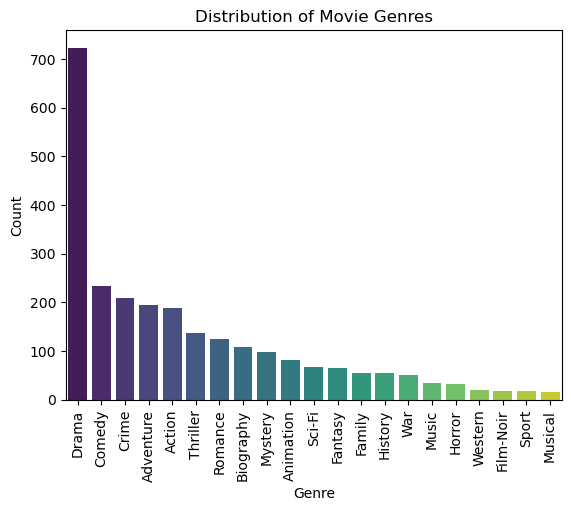

In [28]:
# Count plot of distribution of movie genres
color_palette = sns.color_palette("viridis", n_colors = len(sorted_genres))
sns.countplot(data = df_exploded, x = 'Genre', order = sorted_genres, palette = color_palette)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The bar plot visually represents the distribution of movie genres in the dataset. Each bar on the graph corresponds to a specific genre, with the x-axis indicating the genres and the y-axis representing the count or frequency of movies belonging to each genre. The histogram reveals that the drama genre has the highest count among the top movies, suggesting it is the most prevalent genre. On the other hand, the musical genre exhibits the lowest count, indicating that it is less represented among the top movies.This information provides insights into the popularity of specific genres among the top movies.

In [29]:
# 'Released_Year' column in descending order
released_year_desc = df['Released_Year'].sort_values(ascending=False)

In [30]:
released_year_desc

613    2020
18     2020
464    2020
205    2020
612    2020
       ... 
193    1925
194    1924
568    1922
127    1921
321    1920
Name: Released_Year, Length: 999, dtype: int32

Sort the 'Released_Year' column in order to identify the range of year that the movies being released.

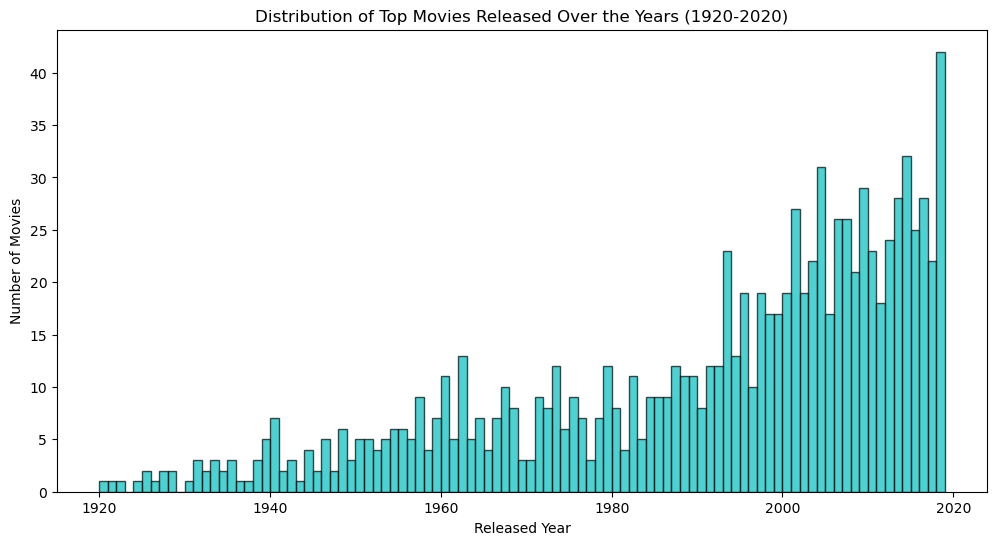

In [31]:
# Histogram of Distribution of top movies released over the years
plt.figure(figsize=(12, 6))
plt.hist(df['Released_Year'], bins=range(1920, 2020), color='c', edgecolor='black', alpha=0.7)
plt.title('Distribution of Top Movies Released Over the Years (1920-2020)')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
plt.grid(False)
plt.show()

The bar plot illustrates the distribution of top movies released over the years from 1920 to 2020. Each bar on the graph represents a specific year, with the x-axis denoting the released year and the y-axis representing the number of movies released. The histogram reveals a general increasing trend in the number of top movies released over the specified period, reaching its peak in 2020. This suggests a growth or surge in the production or recognition of noteworthy films in recent years, potentially influenced by evolving trends, technologies or audience preferences.

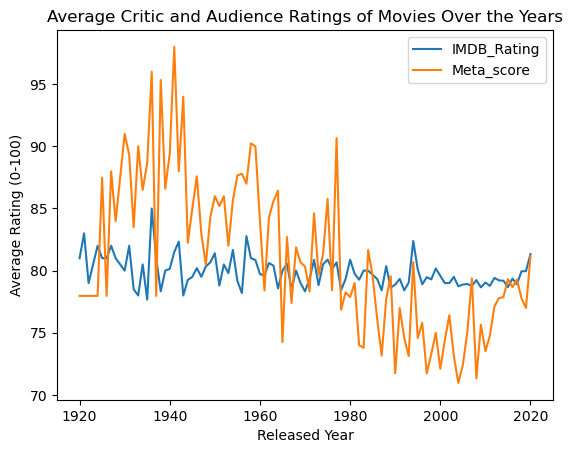

In [32]:
# Convert 'IMDB_Rating' column to the same scale as 'Meta_score'
df['IMDB_Rating'] = df['IMDB_Rating'] * 10

# Line plot of average audience and critic ratings of movies over the years
plt.plot('IMDB_Rating',data = df.groupby('Released_Year')[['IMDB_Rating','Meta_score']].mean())
plt.plot('Meta_score', data = df[df['Meta_score']!=0].groupby('Released_Year')[['IMDB_Rating','Meta_score']].mean())
plt.title('Average Critic and Audience Ratings of Movies Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Average Rating (0-100)')
plt.legend()
plt.show()

Metascore and IMDb rating are distinct metrics used to evaluate movies, reflecting the perspectives of professional critics and general audiences, respectively. Metascore aggregates reviews from reputable critics, providing a weighted average score on a scale of 0 to 100. It offers a critical consensus and categorizes movies into bands, such as Universal Acclaim or Generally Favorable Reviews. On the other hand, IMDb rating relies on user-generated scores ranging from 1 to 10, with each user's vote carrying equal weight. IMDb reflects the collective opinion of the general audience and while it lacks predefined categories, it offers a straightforward average of user scores. Filmmakers and viewers often consider both metrics to gain comprehensive insights into a movie's reception, considering the perspectives of both critics and the public.

The line plot illustrating the average critic and audience ratings  of movies over the years. The output analysis indicates that over the years, there has been a decline in critic ratings, suggesting a general decrease in critical acclaim for movies. However, the plot reveals a trend in the 20th century, critic ratings began to rise again, potentially indicating a resurgence in critical appreciation for films during that period. On the other hand, audience ratings have remained relatively stable or experienced a positive trend over the years. The observed fluctuations in critic ratings may be indicative of changing critical standards or trends in the film industry, while the stability or improvement in audience ratings suggests consistent or growing appeal to moviegoers.

In [33]:
# Calculate and sort the average runtime for each year
average_runtime_by_year = df.groupby('Released_Year')['Runtime'].mean()

sorted_runtime = average_runtime_by_year.sort_values(ascending=False)

sorted_runtime

Released_Year
1930    152.0
1965    151.5
1970    143.0
1956    140.8
1996    137.2
        ...  
1932     78.5
1920     76.0
1921     68.0
1926     67.0
1924     45.0
Name: Runtime, Length: 99, dtype: float64

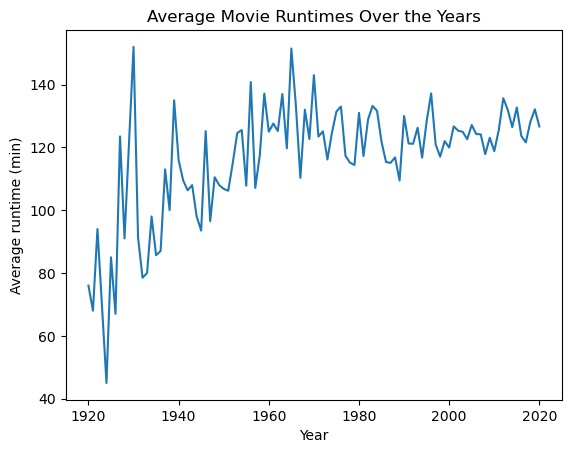

In [34]:
df.groupby('Released_Year')['Runtime'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average runtime (min)')
plt.title('Average Movie Runtimes Over the Years')
plt.show()

The line plot illustrates the evolution of average movie runtimes over the years. In the early 1900s, films tended to have shorter runtimes, possibly reflecting the cinematic norms and storytelling styles of that era. However, as time progressed there was a notable increase in average runtimes, reaching a peak around 1965 with an average of 149 minutes. From the 1960s onwards, movies generally maintained a consistent average runtime in the range of 120-140 minutes.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Outliers</h2>

Outliers are data points that significantly differ from the rest of the data in a dataset. In other words, they are unusually large or small compared to the majority of the data points in a dataset.

Identifying and handling outliers is an important step in the data preprocessing and analysis process because they can have a significant impact on statistical measures and machine learning models. Common methods for detecting outliers include statistical measures such as the Interquartile Range (IQR) and visual methods such as box plots or scatter plots.

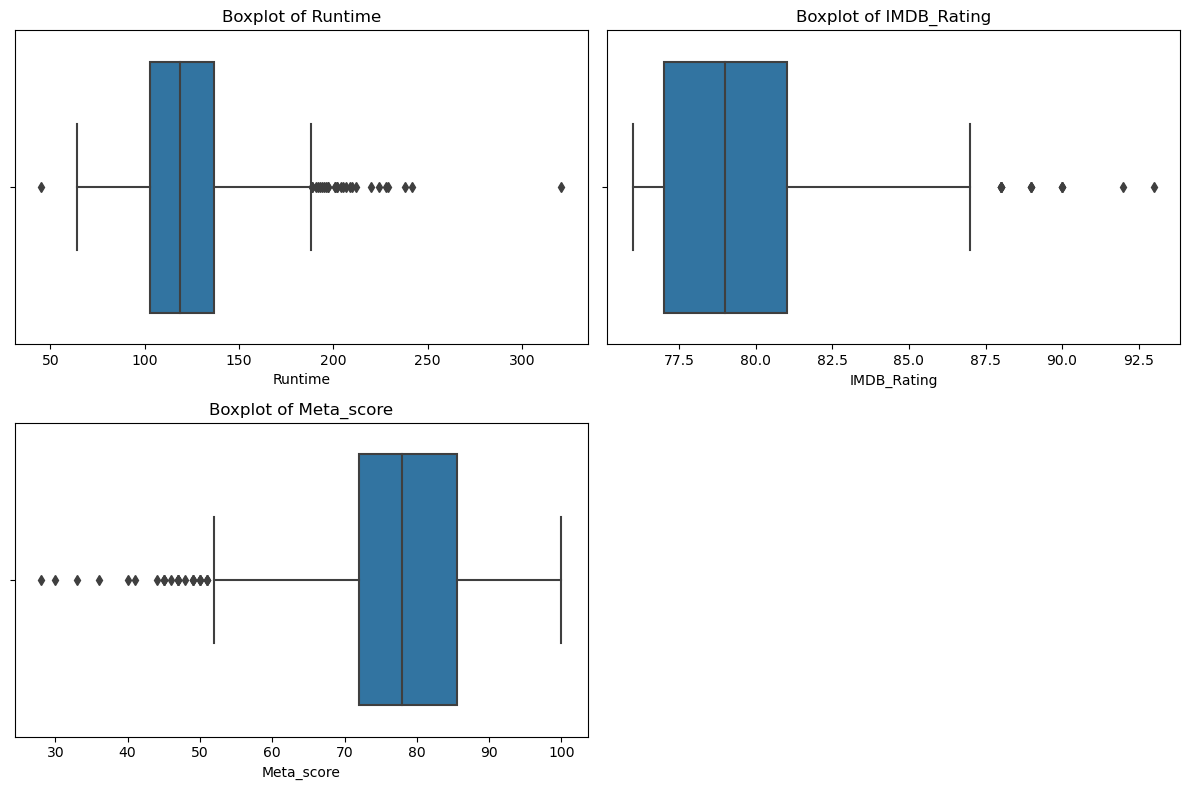

In [35]:
# Selected columns for boxplots
columns = ['Runtime', 'IMDB_Rating', 'Meta_score']

plt.figure(figsize = (12, 8))
for column in columns:
    plt.subplot(2, 2, columns.index(column) + 1)
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In a boxplot, the presence of outliers is identified by individual data points that fall outside the "whiskers" of the box. Outliers are data values that deviate significantly from the central tendency of the dataset. Visually inspecting each boxplot, one can observe points beyond the whiskers, indicating the existence of outliers in the 'Runtime', 'IMDB_Rating' and 'Meta_score' columns.

There are four techniques for managing outliers:
- Complete removal of outliers, which can help maintain a cleaner dataset but may result in the loss of potentially valuable information. 

- Treating outliers as missing values and applying data imputation techniques offers a way to retain the entire dataset, relying on methods to estimate missing values accurately.

- Discretization which involves grouping continuous data into discrete intervals. By applying discretization to the dataset, outliers are incorporated into specific bins, allowing for a balance between outlier inclusion and managing their impact on statistical analyses.

- Capping or censoring outliers involves replacing extreme values with predefined upper and lower limits. This method aims to mitigate the influence of outliers without entirely removing them from the dataset.

In this analysis, the capping method which utilizes the lower and upper bounds based on the quartiles and the calculated IQR is used to handle outliers as it provides a practical way by maintaining a balance between outlier removal and preserving the overall distribution of the data.

In [36]:
# Handle outliers across multiple columns using IQR method
for column in columns:
    
    # Calculate IQR
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)

    # Define lower and upper bounds
    lower_limit = df[column].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[column].quantile(0.75) + (IQR * 1.5)

    # Replace outliers with the upper/lower limit
    df[column] = np.where(df[column] > upper_limit, upper_limit, np.where(df[column] < lower_limit, lower_limit, df[column]))

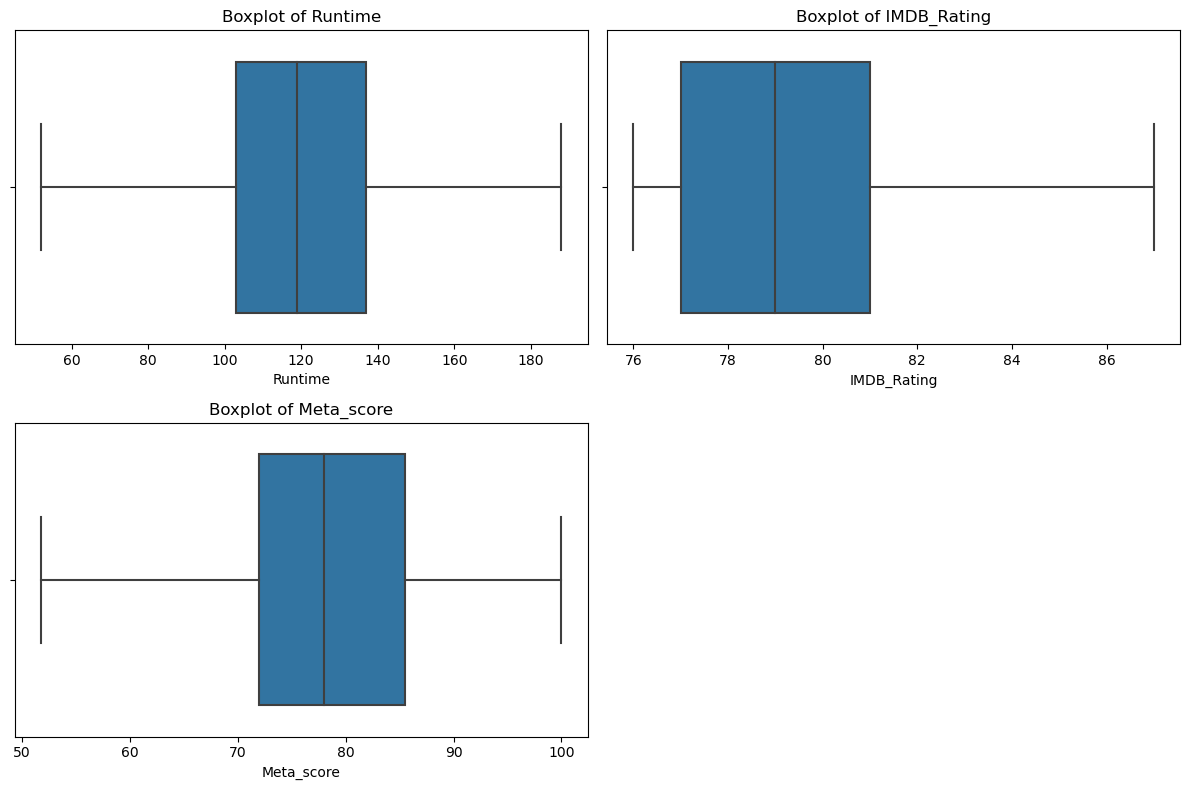

In [37]:
# Boxplots after capping outliers
columns = ['Runtime', 'IMDB_Rating', 'Meta_score']

plt.figure(figsize=(12, 8))
for column in columns:
    plt.subplot(2, 2, columns.index(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

The modified boxplots after outlier capping provide a clearer and more accurate representation of the central tendency and variability in the dataset, as extreme values that could skew the interpretation are addressed.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Discretization</h2>

Data discretization is a process in data preprocessing that involves converting continuous data into discrete categories or bins. It involves dividing a range of continuous values into a set of intervals or bins and assigning data points to these bins based on their values. This transformation is often done to simplify the analysis, reduce noise or meet the requirements of certain algorithms that work better with categorical or discrete data.

There are two main types of data discretization:

1. **Equal-Width Discretization (Binning):**
   - This method divides the range of values into equal-width intervals or bins. The width of each bin is the same, but the number of data points in each bin may vary.

<br>

2. **Equal-Frequency Discretization:**
   - This method divides data points into intervals in such a way that each bin contains approximately the same number of data points. The width of the intervals may vary, but the goal is to ensure equal frequency in each bin.

In [38]:
# Define the bin edges and labels
bin_edges = [0, 65, 85, 100]
bin_labels = ['Negative', 'Average', 'Positive']

# New column 'Meta_score_Category' with the assigned categories
df['Meta_score_Category'] = pd.cut(df['Meta_score'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the updated dataframe
df[['Meta_score', 'Meta_score_Category']].head()

,Meta_score,Meta_score_Category
0,80.0,Average
1,100.0,Positive
2,84.0,Average
3,90.0,Positive
4,96.0,Positive


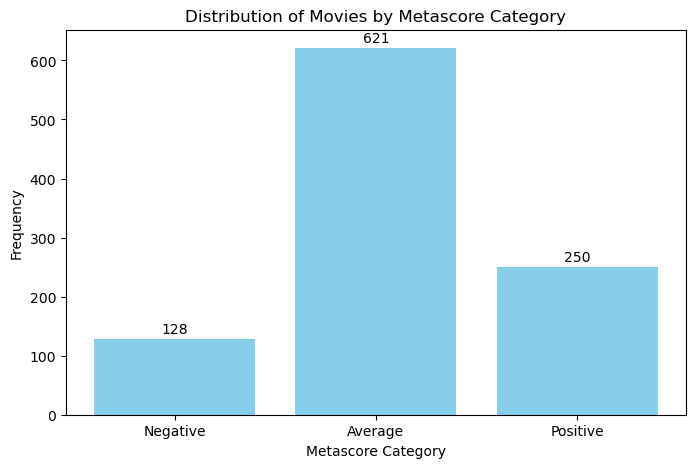

In [39]:
# Count of discretized data
votes_counts = df['Meta_score_Category'].value_counts()

# Sort the value counts in the desired order (Negative, Average, Positive)
votes_counts = votes_counts.reindex(['Negative', 'Average', 'Positive'])

# Histogram plot
plt.figure(figsize=(8, 5))
plt.bar(votes_counts.index, votes_counts, color='skyblue')
plt.title('Distribution of Movies by Metascore Category')
plt.xlabel('Metascore Category')
plt.ylabel('Frequency')

# Customize x-axis labels based on value counts
for i, value in enumerate(votes_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

The data discretization to the 'Meta_score' column categorizing movie meta score into three distinct categories: 'Negative', 'Average' and 'Positive'. The histogram plot visually represents the distribution of movies across these score categories. In this specific case, there are 128 movies categorized as 'Negative' scores, 621 as 'Average' scores and 250 as 'Positive' scores. This information gives better understanding on patterns in movie meta score and can be informative for decision-making processes related to content creation.

It is important to note that the Metascore is not the sole indicator of a movie or TV show's quality or enjoyment. Personal taste and preferences play a significant role in determining whether a particular film or show is enjoyable to an individual viewer. It is always a good idea to read individual reviews, consider the genre and subject matter and watch trailers or previews to form  own opinion.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Summary</h2>

The analysis of the top 1000 movies on IMDb provides valuable insights for both filmmakers and audiences. Firstly, it highlights genre-specific insights among the top movies, enables a more targeted approach to content creation based on the popularity of particular genres among the audience. Besides, filmmakers also can leverage from movie release trends over the years to strategically plan their movie releases.

The insight from financial success and certification could guide filmmakers in making certification decisions to enhance the commercial performance of their movies. Furthermore, from the analysis of average audience and critic ratings, filmmakers can adapt their content to align with changing perspectives and preferences, ensuring resonance with their target audiences.

The analysis on average movie runtimes allows filmmakers to tailor their content to meet audience expectations regarding movie duration. The categorization of IMDb ratings offering insights into the distribution of ratings and factors influencing audience perceptions.

Overall, these insights empower filmmakers and the film industry to make informed decisions regarding content creation, release strategiesand audience engagement. For audiences, the analysis offers a glimpse into the industry's dynamics and providing a better understanding of the patterns that shape the movies they consume.

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="3"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE   ; text-align: center; border-radius: 5px 5px; padding: 7px">3. Data Preparation</h2>

Data transformation is a crucial preprocessing step to ensure that the input data is suitable for the chosen machine learning algorithm, addressing issues related to scale, format, missing values and distribution characteristics. The choice of transformation techniques depends on the nature of the data and the requirements of the specific machine learning algorithm being used.

In [40]:
# Import libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Encoding</h2>

Data encoding refers to the process of converting data from one form or format to another. In the context of machine learning and data analysis, data encoding typically involves transforming categorical or textual data into a numerical format that can be easily processed by machine learning algorithms.

There are two types of data encoding that will be applied in this data preparation:

1. **Label Encoding:**
   - Dealing with nominal categorical labels, where there is a meaningful order among the categories.
   - Each unique label is assigned a unique integer. This is often used when the categories have an ordinal relationship.
   - For example, categories 'Low,' 'Medium,' and 'High,' converting to 0, 1 and 2, respectively.

<br>

2. **One-Hot Encoding:**
   - Dealing with nominal categorical variables where there is no inherent order among the categories. One-hot encoding is also preferred when dealing with a large number of unique categories in a variable.
   - Creates binary columns for each category and represents the presence or absence of that category with 1 or 0, false or true respectively.
   - For example, converting ["dog", "cat", "dog"] to a one-hot encoded representation would be [[1, 0], [0, 1], [1, 0]].

#### Label Encoding

In [41]:
# Create a label encoder instance
label_encoder = LabelEncoder()

In [42]:
# Apply label encoding to the 'Meta_score_Category' column
df['Meta_score_Label'] = label_encoder.fit_transform(df['Meta_score_Category'])

In [43]:
# Display the first few rows of the DataFrame with the encoded column
df[['Meta_score', 'Meta_score_Category', 'Meta_score_Label']].head()

,Meta_score,Meta_score_Category,Meta_score_Label
0,80.0,Average,0
1,100.0,Positive,2
2,84.0,Average,0
3,90.0,Positive,2
4,96.0,Positive,2


#### One-Hot Encoding

Both pd.get_dummies and MultiLabelBinarizer from scikit-learn are used for one-hot encoding, but they have some differences in terms of use cases and functionalities.

1. **pd.get_dummies:**
   - Suitable for one-hot encoding categorical variables where each observation belongs to only one category (single-label).

<br>

2. **MultiLabelBinarizer:**
    - Typically used when dealing with multilabel data where each observation can belong to multiple categories. Can handle situations where a sample has multiple labels across different categories.

The 'Genre' column contains lists of genres associated with each movie, in the other word each movie can belong to multiple genres. Hence, MultiLabelBinarizer is used to one-hot encode these genres into binary columns, indicating the presence or absence of each genre for each movie.

In [44]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

MultiLabelBinarizer is a utility class in scikit-learn used for transforming a list of lists or an iterable of sets into a binary format suitable for machine learning tasks. It is particularly useful when dealing with multi-label classification problems.

In [45]:
# Convert the one-hot encoded array to a dataframe
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index = df.index)

In this case, 'Genre' column is being transformed into into a binary format (one-hot encoded array),  where each genre becomes a binary feature indicating its presence or absence for each movie. This encoded data is in a format that compatible with machine learning models, allowing the models to effectively learn from and make predictions on datasets containing categorical information.

In [46]:
genre_encoded

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


This indicates a new dataframe (df_encoded) with binary columns for each unique genre using one-hot encoding. The resulting dataframe will have 0s and 1s indicating the presence or absence of each genre for each movie.

In [47]:
# Concatenate the original dataframe (df) and the genre_encoded dataframe along the columns axis
df = pd.concat([df, genre_encoded], axis=1)

In [48]:
# Convert the one-hot encoded array to a dataframe
cert_encoded = pd.DataFrame(mlb.fit_transform(df['Certificate']), columns=mlb.classes_, index=df.index)

In [49]:
cert_encoded

,-,/,1,3,4,6,A,G,M,P,...,a,d,e,n,o,p,r,s,t,v
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df = pd.concat([df, cert_encoded], axis=1)

In [51]:
# Drop the original column
df.drop(['Certificate','Genre', 'Meta_score', 'Meta_score_Category',], axis=1, inplace=True)

Dropping the original column of an encoded categorical variable is crucial to prevent data leakage.

In [52]:
df

,Released_Year,Runtime,IMDB_Rating,Meta_score_Label,Action,Adventure,Animation,Biography,Comedy,Crime,...,a,d,e,n,o,p,r,s,t,v
0,1994,142.0,87.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,175.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2008,152.0,87.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1974,188.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1957,96.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,115.0,76.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
996,1956,188.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,1953,118.0,76.0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0
998,1944,97.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Normalization</h2>

Many machine learning algorithms are sensitive to the scale of the input features. Normalizing or standardizing the data ensures that all features have a similar scale, preventing certain features from dominating the learning process. Apply normalization or standardization to both the training and testing sets. 

In [53]:
# StandardScaler instance
scaler = StandardScaler()

In [54]:
# Fit the scaler to the training set and transform both training and test sets
df_scaled = scaler.fit_transform(df)

The fit_transform method is used on the training set (x_train). This step calculates the mean and standard deviation of each feature in the training set and then scales the features accordingly. While transform method is used on the testing set (x_test) without re-fitting the scaler. This ensures that the same transformation (mean and standard deviation) learned from the training set is applied to the testing set.

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="4"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 7px">4. Model Training and Evaluation</h2>

Clustering is a type of unsupervised machine learning technique where the goal is to group similar data points together based on certain features or characteristics. In other words, clustering aims to find natural groupings or patterns in a dataset without any predefined labels or target values. The primary objective of clustering is to organize a set of observations into groups, or clusters, such that data points within the same cluster are more similar to each other than to those in other clusters. The similarity or dissimilarity between data points is typically determined by a distance metric.

There are various clustering algorithms, and one of the most commonly used methods is k-means clustering. In k-means clustering, the algorithm divides the dataset into a specified number of clusters (k) based on the mean (centroid) of data points in each cluster. The algorithm iteratively assigns data points to the nearest centroid and updates the centroids until convergence. Other clustering algorithms include hierarchical clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and others. Each algorithm has its own strengths and weaknesses and the choice of a specific algorithm depends on the nature of the data and the desired outcomes.

Clustering has various applications in different domains, such as customer segmentation in marketing, anomaly detection in cybersecurity, image segmentation in computer vision and many more. It is a valuable tool for exploring patterns within data and gaining insights into the underlying structure of a dataset.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">K-Means Clustering</h2>

The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique are the elbow method and silhouette score calculation which is described below.

In [55]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [56]:
inertia = [] # Within-Cluster Sum of Squares
silhouette_scores = []

In [57]:
inertia = [] # Within-Cluster Sum of Squares
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))

#### Inertia or Within-Cluster Sum of Squares

Inertia represents the within-cluster sum of squares, and it quantifies how compact the clusters are. Lower inertia values indicate more compact clusters. As the number of clusters increases, inertia tends to decrease because smaller clusters result in smaller within-cluster distances.

In [58]:
inertia

[43873.307653718235,
 39906.04921896663,
 36265.09431222988,
 34927.943464241245,
 32421.34031852464,
 30753.053014579207,
 28822.60065694994,
 28845.6993238405,
 26785.787119909874]

The elbow point is the point in the plot where the rate of decrease in inertia starts to slow down. This point is often considered the optimal number of clusters, as it represents a trade-off between capturing the structure in the data and avoiding overfitting.

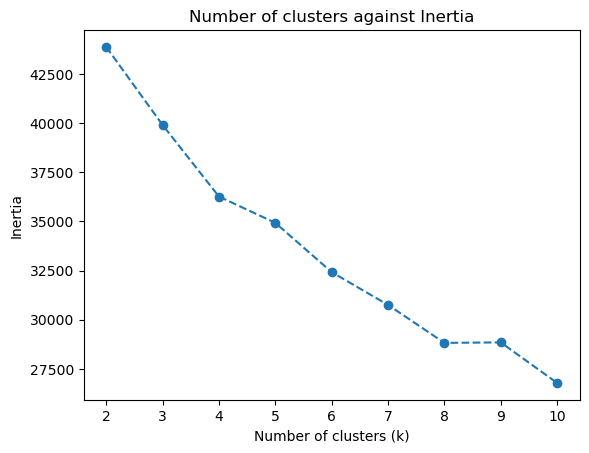

In [59]:
# Plot the Elbow Method
plt.plot(range(2, 11), inertia, '--o')
plt.title('Number of clusters against Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Based on the elbow method, the optimal number of clusters is often chosen where the rate of decrease in inertia starts to slow down. In this case, while the elbow isn't sharply defined, there's a noticeable change in the slope of the curve after 4 clusters. Hence, we might consider using 4 as the optimal number of clusters for K-means algorithm, as it seems to be the point just before diminishing returns set in.

#### Silhouette score

The silhouette score is a metric used to calculate the goodness of a clustering technique, indicating how well-separated the clusters are. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The silhouette score for each data point is a measure of how similar it is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score can be used to determine the optimal number of clusters for a given dataset, similar to the elbow method.

In [60]:
silhouette_scores

[0.5014375884475406,
 0.4340633398714226,
 0.4480427158495205,
 0.06857282926502521,
 0.09420679724608344,
 0.10783806907953054,
 0.10388706042986687,
 0.11574969207636938,
 0.1137982978785918]

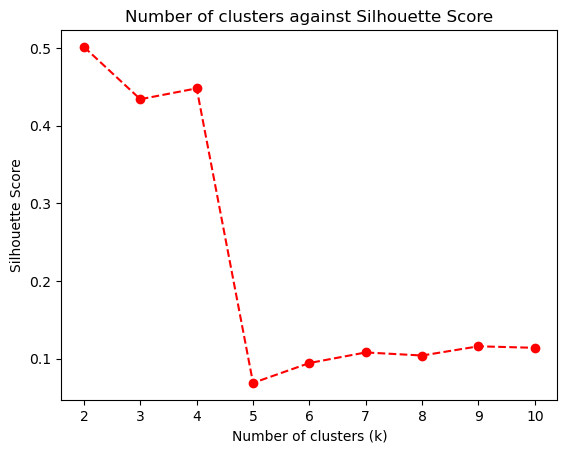

In [61]:
# Silhouette score plot
plt.plot(range(2, 11), silhouette_scores, '--o', color='red')
plt.title('Number of clusters against Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The silhouette scores generally decrease as the number of clusters increases, but the peak (elbow) in the plot is often considered as the optimal k.

The highest silhouette score is 0.5014, and it occurs when k is 2. This suggests that when the data is divided into two clusters, the clusters are well-separated.

In this case, the silhouette score is relatively high and stable for k=4 (0.4480), indicating that dividing the data into four clusters provides well-defined and separated clusters. k=4 seems to be a reasonable choice as it provides a good balance between well-defined clusters and the number of clusters.

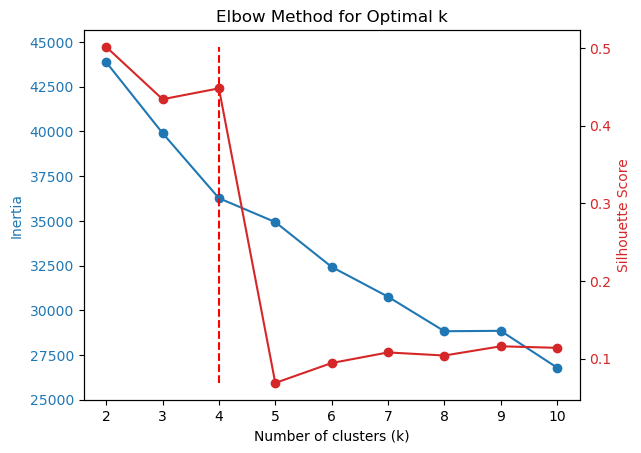

Optimal Number of Clusters (k): 4


In [62]:
# Plot the Elbow Method and Silhouette Scores
optimal_k = 4

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(range(2, 11), inertia, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal k (Elbow)')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, 11), silhouette_scores, '-o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method for Optimal k')
plt.show()

print("Optimal Number of Clusters (k):", 4)

The plot above shows combined plot showing both the Elbow Method (inertia) and Silhouette Scores. These two commonly used metrics are being utilised in this process of determining the optimal number of clusters for a dataset. 

The elbow method involves fitting a clustering algorithm to the data for different values of k and plotting the within-cluster sum of squares (wcss) or inertia against the number of clusters. The point at which the rate of decrease in wcss slows down, creating an "elbow" in the plot, is considered a candidate for the optimal number of clusters. In this case, we can notice that the optimal number of clusters is 4. 

Additionally, the silhouette score, which measures the cohesion and separation of clusters, provides a quantitative measure of cluster quality. A higher silhouette score indicates well-defined clusters. In our analysis, the silhouette score for k=4 signify a reasonable level of separation and cohesion within the clusters. 

Therefore, considering both the elbow method and silhouette score, we choose 4 as the optimal number of clusters for our dataset as shown by a vertical dashed line to indicate the optimal k. This aiming to strike a balance between capturing underlying patterns in the data and avoiding over-segmentation or under-segmentation.

In [63]:
# Assuming df is a NumPy array
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
cluster_labels_kmeans = kmeans.fit_predict(df_scaled)

In [64]:
df['Cluster_kmeans'] = cluster_labels_kmeans

Once we have determined the optimal number of clusters (k=4 in this case), we can proceed with assign cluster labels. After running the K-Means algorithm with the chosen k value, each data point will be assigned to one of the four clusters. A new column named 'Cluster_kmeans' is added to the original data frame which contains the cluster labels obtained from the K-Means Clustering model.

In [65]:
df

,Released_Year,Runtime,IMDB_Rating,Meta_score_Label,Action,Adventure,Animation,Biography,Comedy,Crime,...,d,e,n,o,p,r,s,t,v,Cluster_kmeans
0,1994,142.0,87.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,175.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2008,152.0,87.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1974,188.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1957,96.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,115.0,76.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
996,1956,188.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,1953,118.0,76.0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,2
998,1944,97.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
silhouette_kmeans = silhouette_score(df_scaled, cluster_labels_kmeans)
print(f'The silhouette score for K-Means Clustering with k=4 is {silhouette_kmeans}')

The silhouette score for K-Means Clustering with k=4 is 0.4480427158495205


<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Hierachical Clustering</h2>

Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters. Unlike partitioning methods like k-means, hierarchical clustering doesn't require specifying the number of clusters beforehand. It starts with each data point as its own cluster and then successively merges or agglomerates clusters until all points belong to a single cluster.

Hierarchical clustering has the advantage of providing a hierarchical structure, which allows users to explore different levels of granularity in the clustering solution. However, it can be computationally more expensive than partitioning methods, especially for large datasets. Hierarchical clustering is commonly used in various fields, including biology, social sciences and pattern recognition.

There are two main types of hierarchical clustering:

1. **Agglomerative Hierarchical Clustering:**
   - **Bottom-Up Approach:** Start with each data point as a single cluster and iteratively merge the closest pairs of clusters until only one cluster remains.
   - **Dendrogram:** A tree-like structure (dendrogram) is built to represent the hierarchy of clusters.
   - **Linkage Methods:** Different methods can be used to measure the distance between clusters, such as complete linkage, average linkage, and Ward's method.
   
<br>

2. **Divisive Hierarchical Clustering:**
   - **Top-Down Approach:** Start with all data points in a single cluster and iteratively split clusters until each data point is in its own cluster.

Below code utilise Agglomerative Hierarchical Clustering for the clustering.

In [67]:
# Import libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [68]:
hierarchi = AgglomerativeClustering(n_clusters=4, linkage='ward')

Forming 4 clusters and using the Ward linkage method.

In [69]:
cluster_labels_hierarchi = hierarchi.fit_predict(df_scaled)

In [70]:
df['Cluster_hierarchi'] = cluster_labels_hierarchi

Adding a new column named 'Cluster_hierarchi' to the original data frame which contains assigned cluster labels obtained from the hierarchical clustering model.

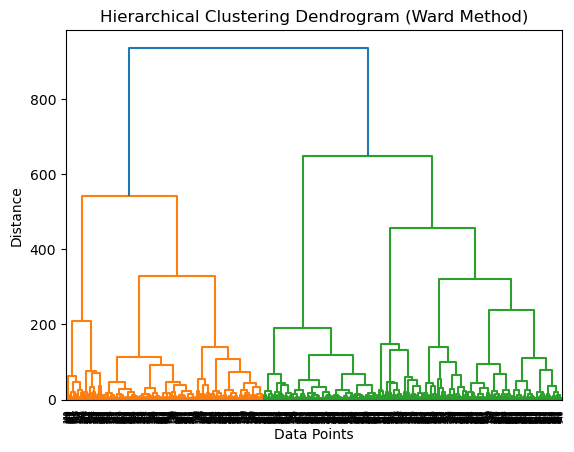

In [71]:
# Perform hierarchical clustering using Ward method and obtain linkage matrix
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix)

# Add labels and title
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Show the plot
plt.show()

The plot above shows dendrogram plot based on the linkage matrix, calculated using the Ward method. The dendrogram visually represents the hierarchy of clusters and the order in which they are merged.
In the dendrogram, each horizontal line represents a data point or a cluster and the vertical lines represent the merging of clusters. The height at which two clusters merge indicates the distance at which the merge occurred.

In [72]:
df

,Released_Year,Runtime,IMDB_Rating,Meta_score_Label,Action,Adventure,Animation,Biography,Comedy,Crime,...,e,n,o,p,r,s,t,v,Cluster_kmeans,Cluster_hierarchi
0,1994,142.0,87.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1972,175.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,2008,152.0,87.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,1974,188.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,1957,96.0,87.0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,115.0,76.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
996,1956,188.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
997,1953,118.0,76.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,2,1
998,1944,97.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [73]:
silhouette_hierarchi = silhouette_score(df_scaled, cluster_labels_hierarchi)
print(f'The silhouette score for Agglomerative Hierarchical Clustering with 4 clusters is {silhouette_hierarchi}')

The silhouette score for Agglomerative Hierarchical Clustering with 4 clusters is 0.4480427158495205
